# COMP40370 Pratical 1



### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import mean_squared_error

## Question 1: Data Exploration

Reading and analyzing a dataframe of medical patient records. Columns 1-8 consist of medical variables and the final column contains the target variable, **Outcome** 

### 1: Descriptive Statistics

In [6]:
#Read diabetes.csv
df = pd.read_csv('diabetes.csv')
#Print First 5 rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [7]:
#Print the number of rows and columns
print("Number of Rows: %d." % (df.shape[0]))
print("Number of Columns: %d" % (df.shape[1]))

Number of Rows: 788.
Number of Columns: 9


In [8]:
#Calculate the min, max, mean, and std of the 'age' column using pandas
min_age = df['Age'].min()
print("The minimum age is: %d" % (min_age))
max_age = df['Age'].max()
print("The maximum age is: %d" % (max_age))
mean_age = df['Age'].mean()
print("The mean age is: %d" % (mean_age))
std_age = df['Age'].std()
print("The standard deviation is: %d" % (std_age))

The minimum age is: 12
The maximum age is: 81
The mean age is: 33
The standard deviation is: 11


In [9]:
#What is the mode of the ‘age’ column? Comment on the data’s modality (i.e., bimodal, trimodal, etc.).
mode_age = df['Age'].mode()
print("The mode of the age column is: %d" % (mode_age))

# The age column has a unimodal mode given that 15 is the only integer that repeats itself

The mode of the age column is: 22


/tmp/ipykernel_9228/3344285596.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("The mode of the age column is: %d" % (mode_age))


In [10]:
#Use pandas to calculate the first quartile (Q1) and the third quartile (Q3) of the 'age' column
Q1_age = df['Age'].quantile(0.25)
print("The First Quartile of the Age Column is : %d" % (Q1_age))
Q3_age = df['Age'].quantile(0.75)
print("The Third Quartile of the Age Column is : %d" % (Q3_age))

The First Quartile of the Age Column is : 24
The Third Quartile of the Age Column is : 41


In [11]:
#What is the interquartile range of the 'age' column?
interquartile_age = Q3_age - Q1_age
interquartile_age

17.0

In [12]:
#Print the five-number summary of the 'age' column

# Five Number summary consists of: Min, Q1, Q2 (Median), Q3, Max
Q2_age = df['Age'].quantile(0.50)
Q2_age
print("Five Number Summary:")
print("\t#1: The min value for the Age Column is %d." % (min_age))
print("\t#2: The Q1 value for the Age Column is %d." % (Q1_age))
print("\t#3: The Q2(Median) value for the Age Column is %d." % (Q2_age))
print("\t#4: The Q3 value for the Age Column is %d." % (Q3_age))
print("\t#5: The max value for the Age Column is %d." % (max_age))

Five Number Summary:
	#1: The min value for the Age Column is 12.
	#2: The Q1 value for the Age Column is 24.
	#3: The Q2(Median) value for the Age Column is 29.
	#4: The Q3 value for the Age Column is 41.
	#5: The max value for the Age Column is 81.


### 2: Data Visualisation

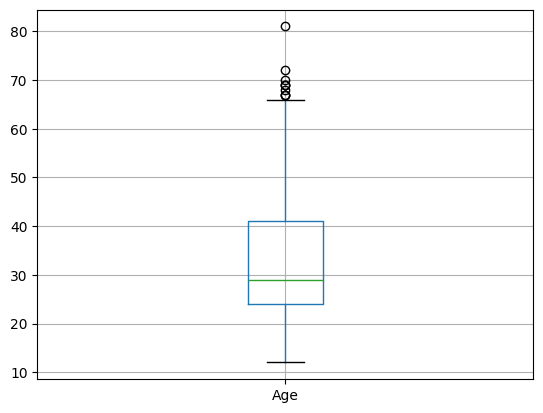

In [13]:
# Show a boxplot of the age column
boxplot = df.boxplot(column='Age')
plt.show()

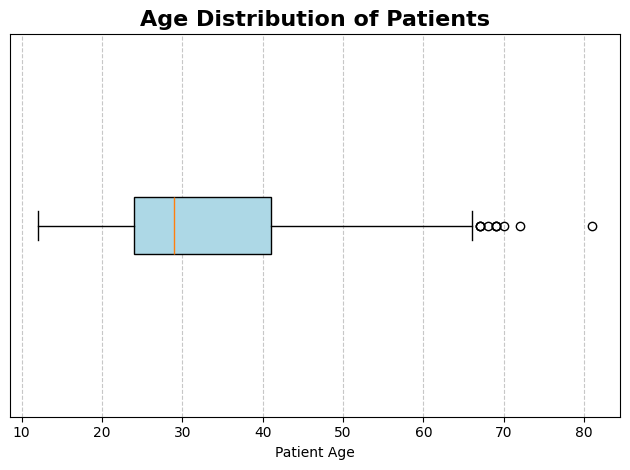

In [17]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig1, ax1 = plt.subplots()

# Create the boxplot
boxplot = ax1.boxplot(df['Age'], vert=False, patch_artist=True)

# Customize the boxplot colors
colors = ['lightblue']
for patch in boxplot['boxes']:
    patch.set_facecolor(colors[0])

# Add labels and title
ax1.set_xlabel('Patient Age')
ax1.set_title('Age Distribution of Patients', fontweight='bold', fontsize=16)

ax1.set_yticks([])

# Add grid lines
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
#plt.show()
fig1.tight_layout()
plt.show()


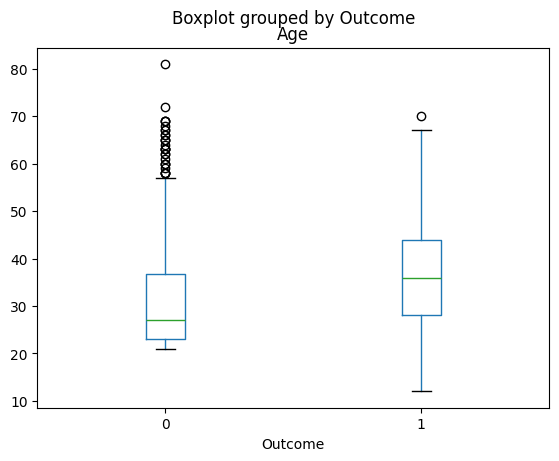

In [36]:
df.boxplot(column='Age', by='Outcome', grid=False)
plt.show()

In [22]:
# Show a boxplot of the age column of the diabetic and non-diabetic groups side by side


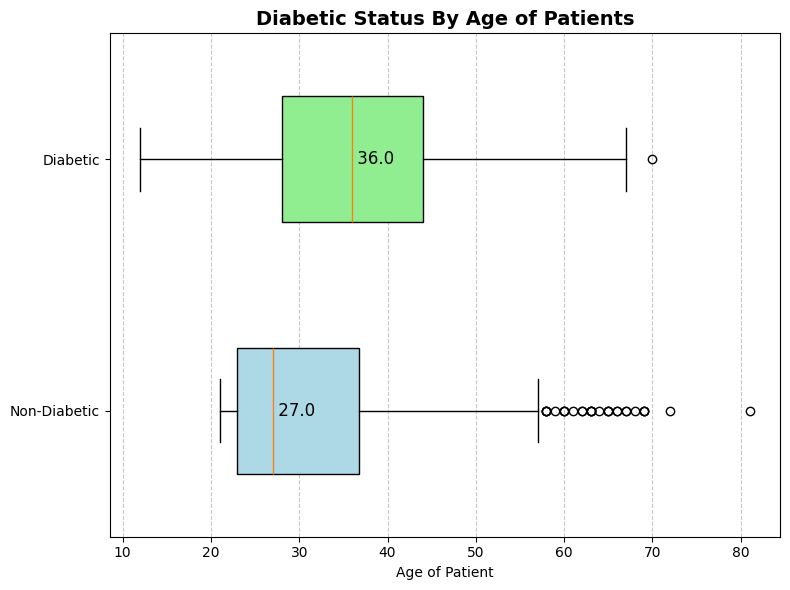

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame (replace with your actual DataFrame)
#data = {
#    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
#    'Outcome': [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]
#}
# df = pd.DataFrame(data)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Split the data based on 'Outcome' values
age_outcome_0 = df[df['Outcome'] == 0]['Age']
age_outcome_1 = df[df['Outcome'] == 1]['Age']

# Create boxplots for both groups on the same subplot
boxplot_0 = ax.boxplot(age_outcome_0, positions=[0], vert=False, patch_artist=True, widths=0.5)
boxplot_1 = ax.boxplot(age_outcome_1, positions=[1], vert=False, patch_artist=True, widths=0.5)

# Customize the boxplot colors
colors_0 = ['lightblue']
colors_1 = ['lightgreen']
for patch in boxplot_0['boxes']:
    patch.set_facecolor(colors_0[0])
for patch in boxplot_1['boxes']:
    patch.set_facecolor(colors_1[0])

# Add labels and titles
ax.set_yticks([1, 0])
ax.set_yticklabels(['Diabetic', 'Non-Diabetic'])
ax.set_xlabel('Age of Patient')
ax.set_title('Diabetic Status By Age of Patients', fontweight='bold', fontsize=14)

median_0 = age_outcome_0.median()
median_1 = age_outcome_1.median()

ax.text(median_0, 0, f' {median_0}', verticalalignment='center', fontsize=12, color='black')
ax.text(median_1, 1, f' {median_1}', verticalalignment='center', fontsize=12, color='black')


# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


#### Analyse the relationship between the patient’s age and being diabetic in your report.
With a low amount of outliers and a median age of 36, it appears that most patients likely became diabetic in their mid 30s, while non-diabetics have either not reached an age where they developed diabetes (below 30), or are already past a point in their life where they could develop diabetes (likely due to life-long healthy eating habits).

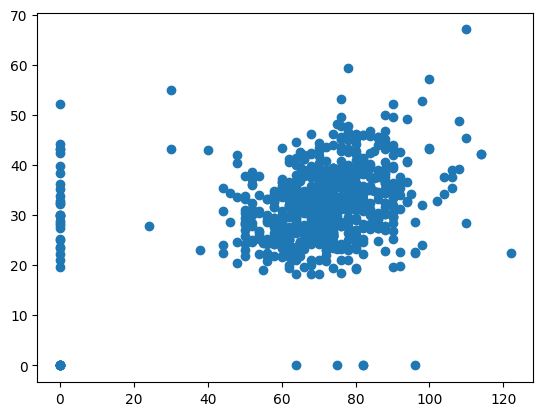

In [59]:
#Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on the y-axis.
plt.scatter(df['BloodPressure'], df['BMI'])
plt.show()

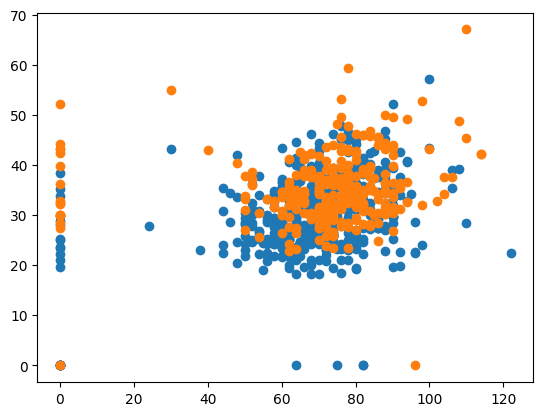

In [14]:
#Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on the y-axis, highlighting diabetic patients with different colours. The colouring label should be
‘diabetic’: yes and no.
nondiabetic = df[df['Outcome'] == 0]
diabetic = df[df['Outcome'] == 1]

plt.scatter(nondiabetic['BloodPressure'], nondiabetic['BMI'])
plt.scatter(diabetic['BloodPressure'], diabetic['BMI'])
plt.show()

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
783,8,107,80.0,0,0,24.6,0.856,34,0
784,13,158,114.0,0,0,42.3,0.257,44,1
785,2,121,70.0,32,95,39.1,0.886,23,0
786,7,129,68.0,49,125,38.5,0.439,43,1


### 3: Data Filtering

In [16]:
#Select all patients with Insulin more than 400. How many patients are diabetic/no-diabetic among those selected?
df2 = df[df['Insulin'] > 400]
df2_diabetic = df2[df2['Outcome'] == 1]
num_diabetic = len(df2_diabetic)
df2_nondiabetic = df2[df2['Outcome'] == 0]
num_nondiabetic = len(df2_nondiabetic)
print("There are %d diabetic patients with insulin over 400 and %d non-diabetic patients with insulin levels over 400 in this dataset." % (num_diabetic, num_nondiabetic))

There are 12 diabetic patients with insulin over 400 and 8 non-diabetic patients with insulin levels over 400 in this dataset.


In [17]:
#Select all patients with Insulin greater than 400 and Glucose greater than 175. How many patients are diabetic/no-diabetic among those selected?
df3 = df2[df2['Glucose'] > 175]
df3_diabetic = df3[df3['Outcome'] == 1]
num_diabetic_2 = len(df3_diabetic)
df3_nondiabetic = df3[df3['Outcome'] == 0]
num_nondiabetic_2 = len(df3_nondiabetic)
print("There are %d diabetic patients with insulin over 400 and Glucose over 175 and %d non-diabetic patients with insulin levels over 400 and glucose over 175 in this dataset" % (num_diabetic_2, num_nondiabetic_2))

There are 5 diabetic patients with insulin over 400 and Glucose over 175 and 1 non-diabetic patients with insulin levels over 400 and glucose over 175 in this dataset


In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
783,8,107,80.0,0,0,24.6,0.856,34,0
784,13,158,114.0,0,0,42.3,0.257,44,1
785,2,121,70.0,32,95,39.1,0.886,23,0
786,7,129,68.0,49,125,38.5,0.439,43,1


In [19]:
#What is the average Glucose level of a patient with more than 5 pregnancies and older than 45?
df4 = df[df['Pregnancies'] > 5]
df4 = df4[df4['Age'] > 45]
df4_avg_glu = df4['Glucose'].mean()
print("The average glucose level for patients over 45 with more than 5 pregnancies is: %d." % (df4_avg_glu))

The average glucose level for patients over 45 with more than 5 pregnancies is: 135.


In [20]:
#Count the distinct values in the ‘pregnancies’ column.
distinct_preg = len(df['Pregnancies'].unique())
print("There are %d distinct values in the pregnancies column." % (distinct_preg))

There are 17 distinct values in the pregnancies column.


In [21]:
#List the distinct values of the ‘pregnancies’ column along with the percentage of diabetic/no-diabetic of each value.
grouped_df = df.groupby('Pregnancies')['Outcome']
value_counts = grouped_df.value_counts(normalize=True)
percentages = value_counts.unstack().fillna(0)
percentages

Outcome,0,1
Pregnancies,,
0,0.660714,0.339286
1,0.773050,0.226950
2,0.824074,0.175926
3,0.644737,0.355263
4,0.666667,0.333333
5,0.637931,0.362069
6,0.680000,0.320000
7,0.434783,0.565217
8,0.450000,0.550000


## Question 2: Data Cleaning

### 1: Duplicated Removal 

In [22]:
#Identify any duplicated records by printing “True” if the row is duplicated and “False” otherwise.
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool


In [23]:
#For all duplicated records, keep one record and remove its duplicates.
df = df.drop_duplicates(keep=False)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62.0,0,0,22.5,0.142,33,0
763,10,101,76.0,48,180,32.9,0.171,63,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


In [24]:
#What is the dimension of the data frame after removing the duplicates?
print("Number of Rows: %d." % (df.shape[0]))
print("Number of Columns: %d" % (df.shape[1]))

Number of Rows: 748.
Number of Columns: 9


In [25]:
#How many duplicated rows were there (before removing the duplicates)?
num_duplicates = duplicates.sum()
print(num_duplicates)

20


In [26]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62.0,0,0,22.5,0.142,33,0
763,10,101,76.0,48,180,32.9,0.171,63,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


## 2: Missing Values

In [27]:
#How many missing values are in the “blood pressure” column?
print("There are %d missing values in the blood pressure column" % (df['BloodPressure'].isnull().sum(axis = 0)))

There are 23 missing values in the blood pressure column


In [28]:
#Remove the missing records in the “blood pressure” column.
df = df.dropna(subset=['BloodPressure'])

In [29]:
print("Number of Rows: %d." % (df.shape[0]))
print("Number of Columns: %d." % (df.shape[1]))

Number of Rows: 725.
Number of Columns: 9.


In [30]:
#Copy the following columns into a separate data frame: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
df_2 = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].copy()

In [31]:
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,0,33.6,0.627,50
1,1,85,66.0,29,0,26.6,0.351,31
2,8,183,64.0,0,0,23.3,0.672,32
3,1,89,66.0,23,94,28.1,0.167,21
4,0,137,40.0,35,168,43.1,2.288,15
...,...,...,...,...,...,...,...,...
762,9,89,62.0,0,0,22.5,0.142,33
763,10,101,76.0,48,180,32.9,0.171,63
765,5,121,72.0,23,112,26.2,0.245,30
766,1,126,60.0,0,0,30.1,0.349,47


In [137]:
import numpy as np
from sklearn.model_selection import train_test_split

In [138]:
#On the newly copied data from (3). Use sklearn’s train_test_split function to split the data into 90% training and 10% test.pip install -U scikit-learn
X_train, X_test = train_test_split(df_2, test_size=0.1)

In [139]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
96,2,92,62.0,28,0,31.6,0.130,24
479,4,132,86.0,31,0,28.0,0.419,63
554,1,84,64.0,23,115,36.9,0.471,28
328,2,102,86.0,36,120,45.5,0.127,23
354,3,90,78.0,0,0,42.7,0.559,21
...,...,...,...,...,...,...,...,...
29,5,117,92.0,0,0,34.1,0.337,38
699,4,118,70.0,0,0,44.5,0.904,26
46,1,146,56.0,0,0,29.7,0.564,29
660,10,162,84.0,0,0,27.7,0.182,54


In [140]:
#On the test set, set the Glucose to null for those records. And keep a separate copy for evaluation in the following questions.
X_test_2 = X_test.copy()
X_test_2['Glucose'] = np.NaN
X_test_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
96,2,NaN,62.0,28,0,31.6,0.130,24
479,4,NaN,86.0,31,0,28.0,0.419,63
554,1,NaN,64.0,23,115,36.9,0.471,28
328,2,NaN,86.0,36,120,45.5,0.127,23
354,3,NaN,78.0,0,0,42.7,0.559,21
...,...,...,...,...,...,...,...,...
29,5,NaN,92.0,0,0,34.1,0.337,38
699,4,NaN,70.0,0,0,44.5,0.904,26
46,1,NaN,56.0,0,0,29.7,0.564,29
660,10,NaN,84.0,0,0,27.7,0.182,54


In [141]:
#Fill in the missing values of the test set based on the mean of the Glucose of the training set (90%). Calculate the RMSEs for the imputed values of the test set.
X_train_glucose_mean = X_train['Glucose'].mean()
print(X_train_glucose_mean)

120.56134969325153


In [142]:
X_test_2['Glucose'] = X_train_glucose_mean
X_test_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
96,2,120.56135,62.0,28,0,31.6,0.130,24
479,4,120.56135,86.0,31,0,28.0,0.419,63
554,1,120.56135,64.0,23,115,36.9,0.471,28
328,2,120.56135,86.0,36,120,45.5,0.127,23
354,3,120.56135,78.0,0,0,42.7,0.559,21
...,...,...,...,...,...,...,...,...
29,5,120.56135,92.0,0,0,34.1,0.337,38
699,4,120.56135,70.0,0,0,44.5,0.904,26
46,1,120.56135,56.0,0,0,29.7,0.564,29
660,10,120.56135,84.0,0,0,27.7,0.182,54


In [143]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
96,2,92,62.0,28,0,31.6,0.130,24
479,4,132,86.0,31,0,28.0,0.419,63
554,1,84,64.0,23,115,36.9,0.471,28
328,2,102,86.0,36,120,45.5,0.127,23
354,3,90,78.0,0,0,42.7,0.559,21
...,...,...,...,...,...,...,...,...
29,5,117,92.0,0,0,34.1,0.337,38
699,4,118,70.0,0,0,44.5,0.904,26
46,1,146,56.0,0,0,29.7,0.564,29
660,10,162,84.0,0,0,27.7,0.182,54


In [145]:
#Calculate the RMSEs for the imputed values of the test set. 
from sklearn.metrics import mean_squared_error

m_s_e = mean_squared_error(X_test['Glucose'].values, X_test_2['Glucose'].values)
print(m_s_e)
r_m_s_e = np.sqrt(m_s_e)
print("The RMSEs for the imputed values of the test set is: %d." % (r_m_s_e))

1074.6085835176127
The RMSEs for the imputed values of the test set is: 32.


In [146]:
#Fill in the missing values of the test set based on the median of the Glucose of the training set (90%). Calculate the RMSEs for the imputed values of the test set.
X_train_glucose_median = X_train['Glucose'].median()
print(X_train_glucose_median)

115.0


In [147]:
X_test_2['Glucose'] = X_train_glucose_median
X_test_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
96,2,115.0,62.0,28,0,31.6,0.130,24
479,4,115.0,86.0,31,0,28.0,0.419,63
554,1,115.0,64.0,23,115,36.9,0.471,28
328,2,115.0,86.0,36,120,45.5,0.127,23
354,3,115.0,78.0,0,0,42.7,0.559,21
...,...,...,...,...,...,...,...,...
29,5,115.0,92.0,0,0,34.1,0.337,38
699,4,115.0,70.0,0,0,44.5,0.904,26
46,1,115.0,56.0,0,0,29.7,0.564,29
660,10,115.0,84.0,0,0,27.7,0.182,54


In [148]:
#Calculate the RMSEs for the imputed values of the test set. 

m_s_e = mean_squared_error(X_test['Glucose'].values, X_test_2['Glucose'].values)
print(m_s_e)
r_m_s_e = np.sqrt(m_s_e)
print("The RMSEs for the imputed values of the test set is: %d." % (r_m_s_e))

1152.164383561644
The RMSEs for the imputed values of the test set is: 33.


In [149]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
96,2,92,62.0,28,0,31.6,0.130,24
479,4,132,86.0,31,0,28.0,0.419,63
554,1,84,64.0,23,115,36.9,0.471,28
328,2,102,86.0,36,120,45.5,0.127,23
354,3,90,78.0,0,0,42.7,0.559,21
...,...,...,...,...,...,...,...,...
29,5,117,92.0,0,0,34.1,0.337,38
699,4,118,70.0,0,0,44.5,0.904,26
46,1,146,56.0,0,0,29.7,0.564,29
660,10,162,84.0,0,0,27.7,0.182,54


In [150]:
X_test.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [153]:
X_test['Glucose']

96      92
479    132
554     84
328    102
354     90
      ... 
29     117
699    118
46     146
660    162
217    125
Name: Glucose, Length: 73, dtype: int64

In [158]:
X_test.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [163]:
X_test['Glucose'].mode()

0    147
Name: Glucose, dtype: int64

In [169]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
96,2,NaN,62.0,28,0,31.6,0.130,24
479,4,NaN,86.0,31,0,28.0,0.419,63
554,1,NaN,64.0,23,115,36.9,0.471,28
328,2,NaN,86.0,36,120,45.5,0.127,23
354,3,NaN,78.0,0,0,42.7,0.559,21
...,...,...,...,...,...,...,...,...
29,5,NaN,92.0,0,0,34.1,0.337,38
699,4,NaN,70.0,0,0,44.5,0.904,26
46,1,NaN,56.0,0,0,29.7,0.564,29
660,10,NaN,84.0,0,0,27.7,0.182,54


In [165]:
#Use scikit-learn SimpleImputer with the 'most_frequent' strategy, and calculate RMSE.
from sklearn.impute import SimpleImputer
X_test_3 
X_test['Glucose'] = np.NaN
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(X_test)
X_test_3 = imputer.transform(X_test_3)
df_impute = pd.DataFrame(X_test_3, columns=X_test.columns)
df_impute

/home/g2square/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


ValueError: X has 7 features, but SimpleImputer is expecting 8 features as input.

In [ ]:
#Use scikit-learn KNNImputer (for neighbours = 3), and calculate RMSE.

In [ ]:
#Which Imputer is better?